In [1]:
import requests
import pandas as pd
import os
import csv

url = "https://api.ibb.gov.tr/MetroIstanbul/api/MetroMobile/V2/GetTimeTable"
headers = {"Content-Type": "application/json"}

direction_id = 34
date = "2024-09-04"
csv_file = "sefer_saatleri_sade.csv"
file_exists = os.path.exists(csv_file)

boarding_station_ids = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35]

for boarding_station_id in boarding_station_ids:
    print(f"Start: BoardingStationId = {boarding_station_id}")

    for hour in range(6, 24):
        time_string = f"{date}T{str(hour).zfill(2)}:00:00+03:00"
        payload = {
            "BoardingStationId": boarding_station_id,
            "DirectionId": direction_id,
            "DateTime": time_string
        }

        response = requests.post(url, json=payload, headers=headers)

        if response.status_code == 200:
            data = response.json()
            if data.get("Success") and data.get("Data"):
                rows = []
                for item in data["Data"]:
                    station_name = item.get("BoardingStationName")
                    times = item.get("TimeInfos", {}).get("Times", [])
                    for departure_time in times:
                        rows.append({
                            "BoardingStationId": boarding_station_id,
                            "DirectionId": direction_id,
                            "BoardingStationName": station_name,
                            "Sefer Saati": departure_time
                        })

                df = pd.DataFrame(rows)
                df.to_csv(csv_file, mode='a', header=not file_exists, index=False, encoding="utf-8-sig")
                file_exists = True
                print(f"{boarding_station_id} - Hour {hour:02d}:00 - {len(rows)} records added.")
            else:
                print(f"{boarding_station_id} - Hour {hour:02d}:00 - API error:", data.get("Error"))
        else:
            print(f"{boarding_station_id} - Hour {hour:02d}:00 - HTTP error:", response.status_code)

df = pd.read_csv("sefer_saatleri_sade.csv")

grouped = df.groupby(
    ["BoardingStationId", "DirectionId", "BoardingStationName"]
)["Sefer Saati"].apply(lambda x: ",".join(sorted(x))).reset_index()

grouped.to_csv("sefer_saatleri_gruplanmis.csv", index=False, encoding="utf-8-sig")
print("Grouped file created: sefer_saatleri_gruplanmis.csv")


Start: BoardingStationId = 20
20 - Hour 06:00 - 8 records added.
20 - Hour 07:00 - 14 records added.
20 - Hour 08:00 - 14 records added.
20 - Hour 09:00 - 12 records added.
20 - Hour 10:00 - 11 records added.
20 - Hour 11:00 - 10 records added.
20 - Hour 12:00 - 10 records added.
20 - Hour 13:00 - 11 records added.
20 - Hour 14:00 - 10 records added.
20 - Hour 15:00 - 11 records added.
20 - Hour 16:00 - 15 records added.
20 - Hour 17:00 - 16 records added.
20 - Hour 18:00 - 16 records added.
20 - Hour 19:00 - 11 records added.
20 - Hour 20:00 - 8 records added.
20 - Hour 21:00 - 8 records added.
20 - Hour 22:00 - 7 records added.
20 - Hour 23:00 - 6 records added.
Start: BoardingStationId = 21
21 - Hour 06:00 - 8 records added.
21 - Hour 07:00 - 14 records added.
21 - Hour 08:00 - 14 records added.
21 - Hour 09:00 - 12 records added.
21 - Hour 10:00 - 10 records added.
21 - Hour 11:00 - 11 records added.
21 - Hour 12:00 - 10 records added.
21 - Hour 13:00 - 10 records added.
21 - Hour 

In [2]:
import pandas as pd
from datetime import datetime, timedelta

df = pd.read_csv("SEFER_SAAT_34.csv")

base_times_str = df.loc[(df['BoardingStationId'] == 20) & (df['DirectionId'] == 34), 'Sefer Saati'].values[0]
base_times = base_times_str.split(',')

offsets = {
    21: 3,
    22: 5,
    23: 7,
    24: 9,
    25: 11,
    26: 13,
    27: 15,
    28: 17,
    29: 19,
    30: 21,
    32: 23,
    33: 25,
    34: 27,
    35: 29
}

for station_id, minute_offset in offsets.items():
    shifted_times = []
    for t in base_times:
        try:
            new_time = (datetime.strptime(t.strip(), "%H:%M") + timedelta(minutes=minute_offset)).strftime("%H:%M")
            shifted_times.append(new_time)
        except ValueError:
            continue
    df.loc[(df['BoardingStationId'] == station_id) & (df['DirectionId'] == 34), 'Sefer Saati'] = ",".join(shifted_times)

df.to_csv("SEFER_SAAT_34.csv", index=False)
df

,BoardingStationId,DirectionId,BoardingStationName,Sefer Saati
0,20,34,YENIKAPI,"00:00,05:57,06:04,06:12,06:20,06:27,06:35,06:4..."
1,21,34,VEZNECILER,"00:03,06:00,06:07,06:15,06:23,06:30,06:38,06:4..."
2,22,34,HALIC,"00:05,06:02,06:09,06:17,06:25,06:32,06:40,06:4..."
3,23,34,SISHANE,"00:07,06:04,06:11,06:19,06:27,06:34,06:42,06:5..."
4,24,34,TAKSIM,"00:09,06:06,06:13,06:21,06:29,06:36,06:44,06:5..."
5,25,34,OSMANBEY,"00:11,06:08,06:15,06:23,06:31,06:38,06:46,06:5..."
6,26,34,SISLI,"00:13,06:10,06:17,06:25,06:33,06:40,06:48,06:5..."
7,27,34,GAYRETTEPE,"00:15,06:12,06:19,06:27,06:35,06:42,06:50,06:5..."
8,28,34,LEVENT,"00:17,06:14,06:21,06:29,06:37,06:44,06:52,07:0..."
9,29,34,4.LEVENT,"00:19,06:16,06:23,06:31,06:39,06:46,06:54,07:0..."


In [3]:
import pandas as pd
import numpy as np

binen_df = pd.read_csv("binen_yolcu.csv")
hourly_counts = pd.read_csv("station_hourly_passenger_counts.csv")

stations = [
    "YENIKAPI", "VEZNECILER", "HALIC", "SISHANE", "TAKSIM",
    "OSMANBEY", "SISLI", "GAYRETTEPE", "LEVENT", "4.LEVENT",
    "SANAYI MAH.", "ITU", "ATATURK OTO SANAYI", "DARUSSAFAKA", "HACIOSMAN"
]

station_to_index = {station: i for i, station in enumerate(stations)}

def assign_destination(row):
    boarding_station = row["station_poi_desc_cd"]
    transition_hour = int(row["transition_hour"])

    if boarding_station not in station_to_index:
        return np.nan

    boarding_index = station_to_index[boarding_station]

    counts_forward = hourly_counts[
        (hourly_counts["transition_hour"] == transition_hour) &
        (hourly_counts["station_poi_desc_cd"].isin(stations[boarding_index + 1:]))
    ]
    counts_backward = hourly_counts[
        (hourly_counts["transition_hour"] == transition_hour) &
        (hourly_counts["station_poi_desc_cd"].isin(stations[:boarding_index]))
    ]

    if counts_forward["passenger_count"].sum() >= counts_backward["passenger_count"].sum():
        candidates = stations[boarding_index + 1:]
        weights = counts_forward.set_index("station_poi_desc_cd").reindex(candidates)["passenger_count"].fillna(0).values
    else:
        candidates = stations[:boarding_index]
        weights = counts_backward.set_index("station_poi_desc_cd").reindex(candidates)["passenger_count"].fillna(0).values

    if len(candidates) == 0 or weights.sum() == 0:
        return np.nan

    destination = np.random.choice(candidates, p=weights / weights.sum())
    return destination

binen_df["destination"] = binen_df.apply(assign_destination, axis=1)

binen_df.to_csv("binen_yolcu_destination.csv", index=False)
binen_df

,transition_date,transition_hour,line_name,station_poi_desc_cd,destination
0,2024-09-04,0,M2,YENIKAPI,VEZNECILER
1,2024-09-04,0,M2,YENIKAPI,HALIC
2,2024-09-04,0,M2,YENIKAPI,TAKSIM
3,2024-09-04,0,M2,VEZNECILER,SISLI
4,2024-09-04,0,M2,VEZNECILER,OSMANBEY
...,...,...,...,...,...
376145,2024-09-04,23,M2,SISHANE,SISLI
376146,2024-09-04,23,M2,YENIKAPI,TAKSIM
376147,2024-09-04,23,M2,YENIKAPI,VEZNECILER
376148,2024-09-04,23,M2,YENIKAPI,SISLI


In [4]:
import pandas as pd

df = pd.read_csv("binen_yolcu_destination.csv")

stations = [
    "YENIKAPI", "VEZNECILER", "HALIC", "SISHANE", "TAKSIM", "OSMANBEY",
    "SISLI", "GAYRETTEPE", "LEVENT", "4.LEVENT", "SANAYI MAH.", "ITU",
    "ATATURK OTO SANAYI", "DARUSSAFAKA", "HACIOSMAN"
]

station_index = {station: i for i, station in enumerate(stations)}

def determine_direction(row):
    origin = row["station_poi_desc_cd"]
    destination = row["destination"]
    if origin not in station_index or destination not in station_index:
        return None
    if station_index[destination] > station_index[origin]:
        return 1
    elif station_index[destination] < station_index[origin]:
        return 2
    else:
        return None

df["direction"] = df.apply(determine_direction, axis=1)

df.to_csv("binen_yolcu_direction.csv", index=False)
df

,transition_date,transition_hour,line_name,station_poi_desc_cd,destination,direction
0,2024-09-04,0,M2,YENIKAPI,VEZNECILER,1
1,2024-09-04,0,M2,YENIKAPI,HALIC,1
2,2024-09-04,0,M2,YENIKAPI,TAKSIM,1
3,2024-09-04,0,M2,VEZNECILER,SISLI,1
4,2024-09-04,0,M2,VEZNECILER,OSMANBEY,1
...,...,...,...,...,...,...
376145,2024-09-04,23,M2,SISHANE,SISLI,1
376146,2024-09-04,23,M2,YENIKAPI,TAKSIM,1
376147,2024-09-04,23,M2,YENIKAPI,VEZNECILER,1
376148,2024-09-04,23,M2,YENIKAPI,SISLI,1


In [5]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

counts_df = pd.read_csv("formatted_passenger_counts.csv")

def hour_to_minute_interval(hour_str):
    start_str, _ = hour_str.split(" - ")
    h, m, s = map(int, start_str.split(":"))
    return h * 60 + m

counts_df["minute"] = counts_df["transition_hour"].apply(hour_to_minute_interval)
counts_df["center_minute"] = counts_df["minute"] + 30

x = counts_df["center_minute"].values
y = counts_df["passenger_count"].values
cs = CubicSpline(x, y)

minute_range = np.arange(0, 1440)
interpolated_y = cs(minute_range).clip(min=0)

prob_distribution = interpolated_y / interpolated_y.sum()

passenger_df = pd.read_csv("binen_yolcu_direction_updated.csv")

def extract_start_minute(interval):
    start_str = interval.split(" - ")[0]
    h, m, s = map(int, start_str.split(":"))
    return h * 60 + m

passenger_df["start_minute"] = passenger_df["transition_hour"].apply(extract_start_minute)

def assign_random_minute(start_minute, prob_distribution):
    window = prob_distribution[start_minute:start_minute + 60]
    if window.sum() == 0:
        window = np.ones(60) / 60
    else:
        window = window / window.sum()
    return start_minute + np.random.choice(60, p=window)

passenger_df["estimated_minute"] = passenger_df["start_minute"].apply(
    lambda m: assign_random_minute(m, prob_distribution)
)

def minute_to_time_string(minute):
    return f"{minute // 60:02d}:{minute % 60:02d}"

passenger_df["estimated_time"] = passenger_df["estimated_minute"].apply(minute_to_time_string)

passenger_df.to_csv("passenger_with_estimated_times.csv", index=False)
passenger_df

,transition_date,transition_hour,line_name,station_poi_desc_cd,destination,direction,start_minute,estimated_minute,estimated_time
0,2024-09-04,00:00:00 - 00:59:59,M2,YENIKAPI,VEZNECILER,1,0,46,00:46
1,2024-09-04,00:00:00 - 00:59:59,M2,YENIKAPI,HALIC,1,0,50,00:50
2,2024-09-04,00:00:00 - 00:59:59,M2,YENIKAPI,HALIC,1,0,50,00:50
3,2024-09-04,00:00:00 - 00:59:59,M2,VEZNECILER,GAYRETTEPE,1,0,57,00:57
4,2024-09-04,00:00:00 - 00:59:59,M2,VEZNECILER,TAKSIM,1,0,41,00:41
...,...,...,...,...,...,...,...,...,...
376145,2024-09-04,23:00:00 - 23:59:59,M2,SISHANE,SISLI,1,1380,1423,23:43
376146,2024-09-04,23:00:00 - 23:59:59,M2,YENIKAPI,TAKSIM,1,1380,1430,23:50
376147,2024-09-04,23:00:00 - 23:59:59,M2,YENIKAPI,TAKSIM,1,1380,1381,23:01
376148,2024-09-04,23:00:00 - 23:59:59,M2,YENIKAPI,4.LEVENT,1,1380,1381,23:01


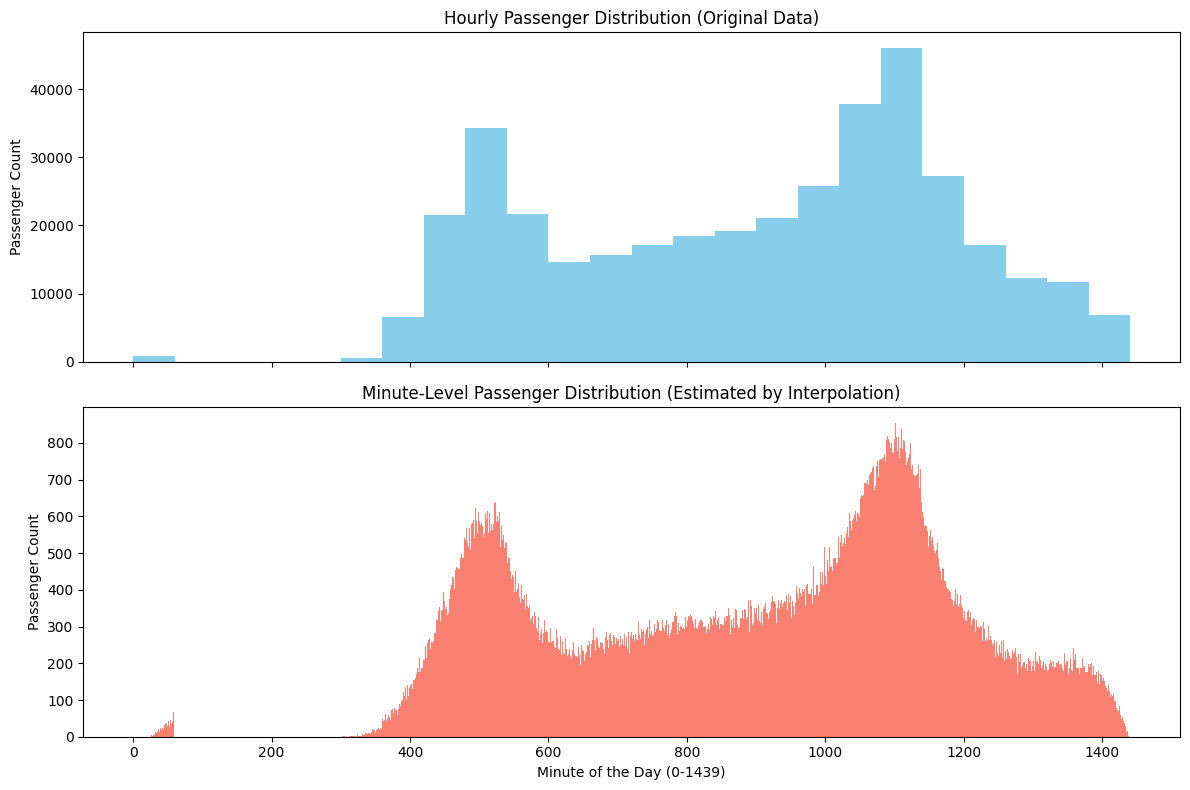

In [6]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

passenger_counts_df = pd.read_csv("formatted_passenger_counts.csv")
passenger_df = pd.read_csv("binen_yolcu_direction_updated.csv")

def hour_to_minute_interval(hour_str):
    start_str = hour_str.split(" - ")[0]
    return int(start_str.split(":")[0]) * 60 + int(start_str.split(":")[1])

passenger_counts_df["minute"] = passenger_counts_df["transition_hour"].apply(hour_to_minute_interval)
passenger_counts_df["center_minute"] = passenger_counts_df["minute"] + 30

x = passenger_counts_df["center_minute"].values
y = passenger_counts_df["passenger_count"].values
cs = CubicSpline(x, y)

minute_range = np.arange(0, 1440)
interpolated_y = cs(minute_range)
prob_distribution = interpolated_y.clip(min=0)
prob_distribution /= prob_distribution.sum()

def extract_start_minute(interval):
    start_str = interval.split(" - ")[0]
    return int(start_str.split(":")[0]) * 60 + int(start_str.split(":")[1])

def assign_random_minute(start_minute, prob_distribution):
    local_probs = prob_distribution[start_minute:start_minute + 60]
    local_probs = local_probs / local_probs.sum() if local_probs.sum() > 0 else np.ones(60) / 60
    return start_minute + np.random.choice(60, p=local_probs)

passenger_df["start_minute"] = passenger_df["transition_hour"].apply(extract_start_minute)
passenger_df["estimated_minute"] = passenger_df["start_minute"].apply(lambda m: assign_random_minute(m, prob_distribution))

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

hourly_counts = passenger_df["start_minute"].value_counts().sort_index()
axs[0].bar(hourly_counts.index, hourly_counts.values, width=60, align='edge', color='skyblue')
axs[0].set_title("Hourly Passenger Distribution (Original Data)")
axs[0].set_ylabel("Passenger Count")

minute_counts = passenger_df["estimated_minute"].value_counts().sort_index()
axs[1].bar(minute_counts.index, minute_counts.values, width=1.0, color='salmon')
axs[1].set_title("Minute-Level Passenger Distribution (Estimated by Interpolation)")
axs[1].set_xlabel("Minute of the Day (0-1439)")
axs[1].set_ylabel("Passenger Count")

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from datetime import datetime

passenger_df = pd.read_csv("PASSENGER_LIST.csv")
sefer_df = pd.read_csv("SEFER_LIST.csv")

passenger_df["enterance_time"] = pd.to_datetime(passenger_df["enterance_time"], format="%H:%M:%S").dt.time
for col in sefer_df.columns:
    if col != "sefer_id":
        sefer_df[col] = pd.to_datetime(sefer_df[col], format="%H:%M:%S").dt.time

passenger_df["sefer_id"] = None
passenger_df["boarding_time"] = None
passenger_df["wait_duration_min"] = None
passenger_df["on_train"] = False

MAX_CAPACITY = 950
active_trains = {}
completed_passengers = set()

sefer_long = sefer_df.melt(id_vars="sefer_id", var_name="station_id", value_name="arrival_time")
sefer_long["station_id"] = sefer_long["station_id"].astype(int)
sefer_long = sefer_long.sort_values(by=["arrival_time", "sefer_id"])

for _, row in sefer_long.iterrows():
    sefer_id = row["sefer_id"]
    station_id = row["station_id"]
    arrival_time = row["arrival_time"]

    if sefer_id not in active_trains:
        active_trains[sefer_id] = []

    still_onboard = []
    for pid in active_trains[sefer_id]:
        dest_id = passenger_df.at[pid, "destination_station_id"]
        if dest_id == station_id:
            completed_passengers.add(pid)
        else:
            still_onboard.append(pid)
    active_trains[sefer_id] = still_onboard

    available_passengers = passenger_df[
        (~passenger_df["on_train"]) &
        (~passenger_df.index.isin(completed_passengers)) &
        (passenger_df["boarding_station_id"] == station_id) &
        (passenger_df["enterance_time"] <= arrival_time)
    ].sort_values(by="enterance_time")

    capacity_left = MAX_CAPACITY - len(active_trains[sefer_id])
    to_board = available_passengers.head(capacity_left)

    for pid in to_board.index:
        passenger_df.at[pid, "sefer_id"] = sefer_id
        passenger_df.at[pid, "boarding_time"] = arrival_time
        wait_minutes = (
            datetime.combine(datetime.today(), arrival_time) -
            datetime.combine(datetime.today(), passenger_df.at[pid, "enterance_time"])
        ).total_seconds() / 60
        passenger_df.at[pid, "wait_duration_min"] = wait_minutes
        passenger_df.at[pid, "on_train"] = True
        active_trains[sefer_id].append(pid)

passenger_df.drop(columns=["on_train"], inplace=True)

passenger_df.to_csv("UPDATED_PASSENGER_LIST.csv", index=False)
print("Results saved to 'UPDATED_PASSENGER_LIST.csv'.")
passenger_df

Results saved to 'UPDATED_PASSENGER_LIST.csv'.


,passenger_id,boarding_station,destination_station,enterance_time,boarding_station_id,destination_station_id,sefer_id,boarding_time,wait_duration_min
0,0,OSMANBEY,ATATURK OTO SANAYI,06:00:00,5,12,1,06:08:00,8.0
1,1,YENIKAPI,LEVENT,06:00:00,0,8,2,06:04:00,4.0
2,2,TAKSIM,SISLI,06:00:00,4,6,1,06:06:00,6.0
3,3,YENIKAPI,OSMANBEY,06:00:00,0,5,2,06:04:00,4.0
4,4,YENIKAPI,SISLI,06:00:00,0,6,2,06:04:00,4.0
...,...,...,...,...,...,...,...,...,...
184075,184075,YENIKAPI,TAKSIM,23:45:00,0,4,195,23:45:00,0.0
184076,184076,TAKSIM,OSMANBEY,23:45:00,4,5,195,23:54:00,9.0
184077,184077,TAKSIM,SISLI,23:45:00,4,6,195,23:54:00,9.0
184078,184078,YENIKAPI,TAKSIM,23:45:00,0,4,195,23:45:00,0.0
